In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from textwrap import indent

from IPython.display import Javascript

from liblet import ANTLR, AnnotatedTreeWalker, Tree, pyast2tree, side_by_side

from operator import add, mul, truediv, sub

from operator import itemgetter

from IPython.display import Latex

from fractions import Fraction

import importlib

from core.arithmetic_manager import ArithManager

from core.util import *

from core.shunting_yard_parser import ShuntingYardParser
from core.arithmetic_manager import ArithManager
from core.util import *

In [3]:
ex1 = '1 + {2 x [(3 + 4 : 2) + 5] x 6} - [ 7 + (1 + 8) : 3 ] x [ 9 : (2 + 1) + 2 ]'
ex2 = '< 2 + 3 > / 4 / < 5 + 6 > / 7'
ex3 = '2 ^ < 3 + 4 ^ 5 : 2 ^ 7 >'
ex4 = '3 + 13 x -<1 + 3>/<2^<1+4> - 6>'
ex5a = '3 / < 4 + 2 > + 2 x { 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > } - < 2 x [ 5 x ( 3 + 4 ) + 5 ] - 1 > / 6'
ex5b = '3 / < 4 + 2 > + 2 x ( 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > ) - < 2 x ( 5 x ( 3 + 4 ) + 5 ) - 1 > / 6'

expr = '( - ( - - ( ( 43 ) ) ^ 2 x ( - ( 78 ) + - ( 94 ) ) ) x - ( ( 19 - 69 ) ) - - ( ( ( - 100 ^ 2 - ( 36 ) ) ) ) )'


expr = '2^-<3/2>'

src = expr

AM = ArithManager()
ptree = AM.ptree('antlrGrammar.g', src)
ast = AM.ptree2ast(ptree)
blocks = AM.blocks(ast)
MEMORY = dict(blocks)

#display(ast)

main_block = blocks[-1][1]
child_to_calc = None

current_block = block_id = None

while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]
    
while blocks:
    block_id, current_block = blocks[0]
        
    parent_to_calc = AM.prior(current_block)
    display_latex(AM.latex(main_block, MEMORY))

    parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                if is_next_to_calc(child) else child
                                for child in parent_to_calc.children]
    
    if is_calculable(current_block):
        current_block = current_block.children[0]
        blocks = blocks[1:]
        
    MEMORY[block_id] = current_block

display_latex(AM.latex(main_block, {}))



ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
def ast_eval(ast, show_latex, show_ast):
    AM = ArithManager()
    
    if show_ast: display(ast)
        
    blocks = AM.blocks(ast)
    MEMORY = dict(blocks)
    main_block = blocks[-1][1]
    child_to_calc = None
    current_block = block_id = None

    while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]

    while blocks:
        block_id, current_block = blocks[0]
        parent_to_calc = AM.prior(current_block)
        tex = AM.latex(main_block, MEMORY)
        if show_latex: display_latex(tex)
        
        parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                    if is_next_to_calc(child) else child
                                    for child in parent_to_calc.children]

        if is_calculable(current_block):
            current_block = current_block.children[0]
            blocks = blocks[1:]

        MEMORY[block_id] = current_block

    tex = AM.latex(main_block, {})
    if show_latex: display_latex(tex)
    
    return main_block.children[0].root['value']


def antlr_eval(expr, show_latex=False, show_ast = False):
    AM = ArithManager()
    ast = AM.ptree2ast(AM.ptree('antlrGrammar.g',expr))
    return ast_eval(ast, show_latex, show_ast)


def shunting_eval(expr, show_latex=False, show_ast = False):
    AM = ArithManager()


    ast = AM.shuntingYardExpr2ast(expr)
    return ast_eval(ast, show_latex, show_ast)


In [5]:
from core.expression_generator import generate_expression

wrong_expr = []
for _ in range(10):
    exception = False
    expr = generate_expression(2)
    
    try:
        antlr_res = antlr_eval(expr)
    except Exception as e:
        print('** EXCEPTION ANTLR ** ', e)
        exception = True

    try:
        shunting_res = shunting_eval(expr)
        if exception: 
            wrong_expr.append(expr)
            continue
    except Exception as e:
        print('** EXCEPTION SHUNTING ** ', e)
        if not exception: 
            wrong_expr.append(expr)
        continue

    formatted_expr = expr.replace('x', '*').replace(':', '/').replace('^', '**')
    res =  round(eval(formatted_expr), 3)

    if antlr_res != shunting_res or abs(antlr_res - res) > 1:
        print("** WRONG ** ", expr)
        wrong_expr.append(expr)
        
    
    #print(antlr_res, shunting_res, res)
        
if wrong_expr != []:
    print(f'*** WRONG {len(wrong_expr)} ***\n')
    for i, it in enumerate(wrong_expr):
        print(f' $$$ {i} $$$  ', it)
else:
    print("ALL DONE")

ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
['(', '(', '49', '-', '33', '-', '--', '71', ')', ')', '+', '(', '52', '-', '(', '--', '(', '21', ')', '-', '5', ')', '/', '(', '(', '16', ')', ')', ')', '^', '2', 'x', '(', '--', '57', '/', '98', '/', '53', '^', '2', '/', '(', '89', ')', '/', '80', '^', '--', '2', ')']
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
['(', '--', '--', '--', '--', '(', '(', '(', '77', ')', '/', '44', ')', '/', '35', '/', '57', 'x', '77', ')', '^', '2', 'x', '98', '/', '73', '/', '(', '26', '-', '33', ')', ')']
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
['--', '--', '--', '--', '39', '+', '36', 'x', '51', 'x', '71', '^', '2', '+', '(', '--', '48', ')']
ANTLR runtime and generated code versions disagree: 4.9.1!=

['39', '/', '--', '15', '/', '16']


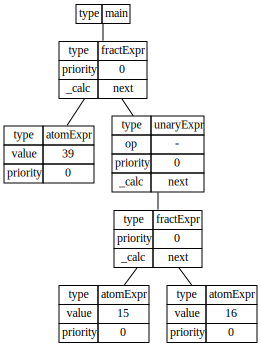

In [30]:
shunting_yard_parser = ShuntingYardParser()

ast = shunting_yard_parser.parse(expr)
ast_eval(ast, False, False)
ast

In [21]:
expr = '39 / - 15 / 16 '
formatted_expr = expr.replace('x', '*').replace(':', '/').replace('^', '**')
real_expr = expr.replace('x', '*').replace(':', '/')
print(real_expr)
res =  round(eval(formatted_expr), 3)
shunt = shunting_eval(expr, True, False)
ant = antlr_eval(expr, False, False)
print(shunt, ant, res)



39 / - 15 / 16 


<IPython.core.display.Latex object>

ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
-13/80 -13/80 -0.163


In [7]:
1 / 2 ** Fraction(-3, 2)

2.82842712474619

In [8]:
Fraction(1, 2) ** -2

Fraction(4, 1)

In [9]:
expr = '( 75 - 7 + - 14 x 35 x ( 70 ) - ( 23 x 5 : ( 40 ) ) ) / - - - 97 / - ( 43 ) / - - ( 65 ) ^ 2 x 89 : 34 x 92 : 4 + 95 + 41 / 60 ^ 2 ^ 2 - ( ( 27 - 19 : ( 7 ) - 80 : - 10 ) ) / ( 81 ) - 63 - 20 x ( ( ( ( 41 / 28 / 54 ) x 71 - 48 - 10 x 88 : 46 ^ 2 ) ) ) - ( - ( 64 ) / - - - 9 + 22 - 58 : - 48 ^ 2 ^ 2 ^ 2 ) : - - ( ( ( ( 25 / ( - 89 - 60 + 99 : 56 x 62 ) ^ 2 ) ) ) ^ 2 ) ^ 2'
antlr_res = antlr_eval(expr)

shunting_res = shunting_eval(expr)
antlr_res, shunting_res



ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
['(', '75', '-', '7', '+', '--', '14', 'x', '35', 'x', '(', '70', ')', '-', '(', '23', 'x', '5', ':', '(', '40', ')', ')', ')', '/', '--', '--', '--', '97', '/', '--', '(', '43', ')', '/', '--', '--', '(', '65', ')', '^', '2', 'x', '89', ':', '34', 'x', '92', ':', '4', '+', '95', '+', '41', '/', '60', '^', '2', '^', '2', '-', '(', '(', '27', '-', '19', ':', '(', '7', ')', '-', '80', ':', '--', '10', ')', ')', '/', '(', '81', ')', '-', '63', '-', '20', 'x', '(', '(', '(', '(', '41', '/', '28', '/', '54', ')', 'x', '71', '-', '48', '-', '10', 'x', '88', ':', '46', '^', '2', ')', ')', ')', '-', '(', '--', '(', '64', ')', '/', '--', '--', '--', '9', '+', '22', '-', '58', ':', '--', '48', '^', '2', '^', '2', '^', '2', ')', ':', '--', '--', '(', '(', '(', '(', '25', '/', '(', '--', '89', '-', '60', '+', '99', ':', '56', 'x', '62', ')', '^', '2', ')', ')', ')', '^'

(Fraction(-3275873520263128885607736546050121549596584118220093800217319, 7580354141431009007654021884536779140654694400000000),
 Fraction(-76183143225802383286740081056231966937624492629956521121333, 176287305614674628084977253128762305596620800000000))

In [10]:
75713/2704 * -1/36 * 1/25281 * 2.806 * 515070259.31

-44465.29303204521